In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# TASK 1: Load dataset
# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")
print("First 5 Rows of Dataset:")
print(df.head())

First 5 Rows of Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
# TASK 2: Median Glucose Level for Diabetic Patients
median_glucose = df[df['Outcome'] == 1]['Glucose'].median()
print("\nMedian Glucose Level for Diabetic Patients:", median_glucose)


Median Glucose Level for Diabetic Patients: 140.0


In [9]:
# TASK 3: Class Distribution for Diabetes Dataset
print("\nClass Distribution:")
print(df['Outcome'].value_counts())


Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [11]:
# TASK 4: Separate Features and Target (Diabetes Dataset)
X_diabetes = df.drop('Outcome', axis=1)
Y_diabetes = df['Outcome']

In [12]:
# TASK 5 & 6: Train-Test Split (3:1 Ratio with Stratify)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, Y_diabetes, test_size=0.25, stratify=Y_diabetes, random_state=42)


In [13]:
# TASK 7: Fit Decision Tree Classifier on Diabetes Dataset
dt_d = DecisionTreeClassifier(random_state=42)
dt_d.fit(X_train_d, y_train_d)
y_pred_dt_d = dt_d.predict(X_test_d)
accuracy_dt_d = accuracy_score(y_test_d, y_pred_dt_d)
print("\nDecision Tree Accuracy on Diabetes Dataset:", accuracy_dt_d)


Decision Tree Accuracy on Diabetes Dataset: 0.7447916666666666


In [14]:
# TASK 8: Overfitting Check for Diabetes Dataset
y_train_pred_d = dt_d.predict(X_train_d)
train_accuracy_d = accuracy_score(y_train_d, y_train_pred_d)
print("Training Accuracy:", train_accuracy_d)
print("Test Accuracy:", accuracy_dt_d)


Training Accuracy: 1.0
Test Accuracy: 0.7447916666666666


In [15]:
# TASK 9: Classification Report
print("\nClassification Report for Diabetes Dataset (Decision Tree):")
print(classification_report(y_test_d, y_pred_dt_d))



Classification Report for Diabetes Dataset (Decision Tree):
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



In [16]:
# TASK 10: Confusion Matrix for Diabetes Dataset
cm_dt_d = confusion_matrix(y_test_d, y_pred_dt_d)
print("\nConfusion Matrix:")
print(cm_dt_d)


Confusion Matrix:
[[106  19]
 [ 30  37]]


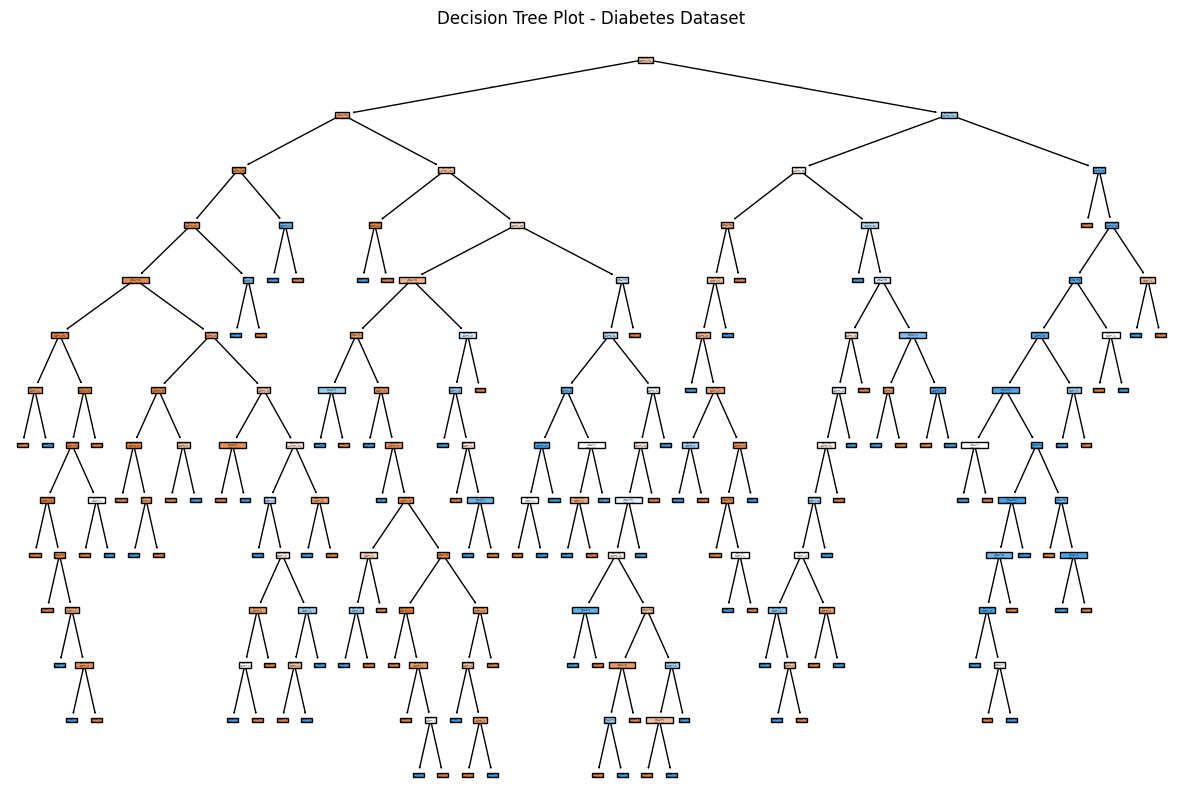

In [17]:
# TASK 11: Plot Decision Tree for Diabetes Dataset
plt.figure(figsize=(15, 10))
plot_tree(dt_d, feature_names=X_diabetes.columns, filled=True)
plt.title("Decision Tree Plot - Diabetes Dataset")
plt.show()



In [18]:
# TASK 12: Feature Importance for Diabetes Dataset
importances_d = dt_d.feature_importances_
print("\nFeature Importances for Diabetes Dataset:")
for feature, importance in zip(X_diabetes.columns, importances_d):
    print(f"{feature}: {importance}")



Feature Importances for Diabetes Dataset:
Pregnancies: 0.05897369427429767
Glucose: 0.33926428774440365
BloodPressure: 0.0973749924263471
SkinThickness: 0.023689552238805967
Insulin: 0.07856547352269817
BMI: 0.16843363479697146
DiabetesPedigreeFunction: 0.11793092600022782
Age: 0.11576743899624825


In [19]:
# TASK 13: KNN Classifier for Diabetes Dataset
knn_d = KNeighborsClassifier(n_neighbors=4)
knn_d.fit(X_train_d, y_train_d)
y_pred_knn_d = knn_d.predict(X_test_d)
accuracy_knn_d = accuracy_score(y_test_d, y_pred_knn_d)
print("\nKNN Classifier Accuracy on Diabetes Dataset:", accuracy_knn_d)


KNN Classifier Accuracy on Diabetes Dataset: 0.7291666666666666
